In [107]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm








# beta_rel = 0.305
beta_rel = 0.106

# gamma = 1.050
gamma = 1.006


I=0.4
L = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 0.01 # <E> [eV] = kb*T
T_l =  0.001 # <E> [eV]
B = 0.060 # T for AD
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 182.43280000000 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T





beta_x=10 
beta_y=4
emittance=10*1e-6

arc=dtk.LinearTransferMatrix(Q_x=5.38518956965, Q_y=5.36921653748,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )




num_particles=1




#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),

mu=0
sigma_x=np.sqrt(5*beta_x)*1e-3
sigma_px=np.sqrt(5/beta_x)*1e-3
sigma_cutoff = 3 # cutoff at 3 standard deviations

x = np.random.normal(mu, sigma_x, size=num_particles)
x_trunc = np.clip(x, mu - sigma_cutoff*sigma_x, mu + sigma_cutoff*sigma_x)

px = np.random.normal(mu, sigma_px, size=num_particles)
px_trunc = np.clip(px, mu - sigma_cutoff*sigma_px, mu + sigma_cutoff*sigma_px)

y = np.random.normal(mu, sigma_x, size=num_particles)
y_trunc = np.clip(y, mu - sigma_cutoff*sigma_x, mu + sigma_cutoff*sigma_x)

py = np.random.normal(mu, sigma_px, size=num_particles)
py_trunc = np.clip(py, mu - sigma_cutoff*sigma_px, mu + sigma_cutoff*sigma_px)

#mmu_px=np.sqrt(emittance/beta_x)
#mu_y=np.sqrt(beta_y*emittance)

#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#x=np.clip(x, mu - sigma_cutoff*sigma, mu + sigma_cutoff*sigma)


dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=20*1e-3,
        py=0,
        delta=5e-4,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=B_ratio)

       


num_turns=int(1.5e6)
step=1000

# initialize arrays
x = []
px = []
y = []
py = []
delta = []
action_x = []
action_y = []
force = []


max_amplitude_x = []
max_amplitude_y = []
max_delta = []

goal_action=1e-12

for i in tqdm(range(num_turns)):
    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        delta.append(dtk_particle.delta)
   
        # calculate action in horizontal plane
        action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
        
        max_amplitude_x.append(np.sqrt(2*(action_x_temp)*beta_x))
        # calculate action in vertical plane
        action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
        action_y.append(action_y_temp)
        
        max_amplitude_y.append(np.sqrt(2*(action_y_temp)*beta_y))

        max_delta.append((dtk_particle.delta))
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
y = np.array(y)
py = np.array(py)
delta=np.array(delta)
action_x = np.array(action_x)
action_y = np.array(action_y)
force = np.array(force)

max_amplitude_x=np.array(max_amplitude_x)
max_amplitude_y=np.array(max_amplitude_y)



time = np.arange(0, num_turns, step) * ms_per_turn



100%|██████████| 1500000/1500000 [01:48<00:00, 13807.85it/s]


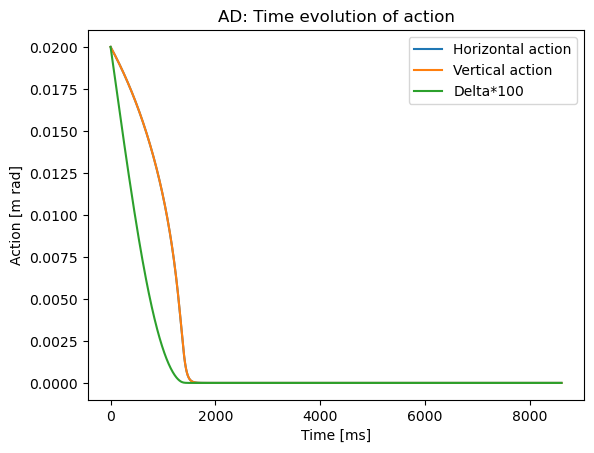

In [110]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,max_amplitude_x,label='Horizontal action')
plt.plot(time,max_amplitude_y,label='Vertical action')
plt.plot(time,delta*40,label='Delta*100')
plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD: Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)



In [100]:
#np.save("plot_data/4d_t.npy", time)
#np.save("plot_data/4d_x.npy", max_amplitude_x)
#np.save("plot_data/4d_y.npy", max_amplitude_y)

np.save("plot_data/3d_delta.npy", delta)

#np.save("plot_data/1d_x.npy", max_amplitude_x)
#np.save("plot_data/2d_x.npy", max_amplitude_x)
#np.save("plot_data/2d_y.npy", max_amplitude_y)

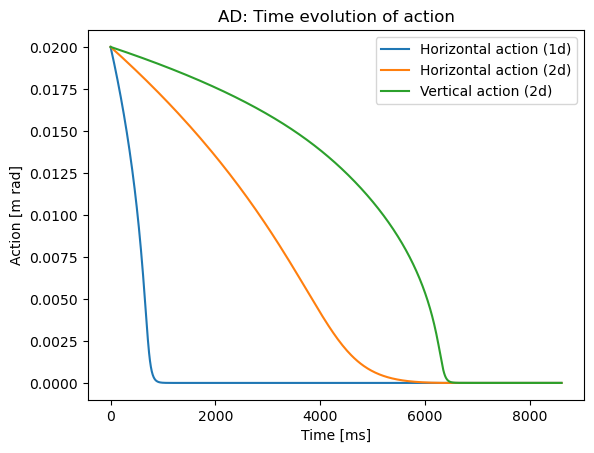

In [101]:
max_amplitude_x_2d=np.load('plot_data/2d_x.npy')
max_amplitude_y_2d=np.load('plot_data/2d_y.npy')

max_amplitude_x_1d=np.load('plot_data/1d_x.npy')

max_amplitude_x=np.load('plot_data/4d_x.npy')
max_amplitude_y=np.load('plot_data/4d_y.npy')
time=np.load('plot_data/4d_t.npy')



# plot the horizontal and vertical action vs time
plt.figure()
plt.plot(time,max_amplitude_x_1d,label='Horizontal action (1d)')
plt.plot(time,max_amplitude_x_2d,label='Horizontal action (2d)')
plt.plot(time,max_amplitude_y_2d,label='Vertical action (2d)')
#plt.plot(time, max_amplitude_x, label='Horizontal action (4d)')
#plt.plot(time, max_amplitude_y, label='Vertical action (4d)')
plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD: Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)

